# Welcome to Google Collab! 

### The purpose of this notebook is to discuss the theory of Geometric Brownian Motion with Jumps.
$\:$

### First, let's quickly review jumps from Stocastic Calculus for Finance II by Schreve

$\:$

### Chapter 11 


$N(t)$ is a *Poisson process*. 

$$ N(t)=   \left\{
\begin{array}{ll}
      0 & if \: \: 0 \leq t<S_1 \\
      1 & if \: \: S_1 \leq t < S_2 \\
      2 & if \: \: S_2 \leq t < S_3 \\
      n & if S_n \leq t < S_{n+1} 
\end{array} 
\right.  $$

$\:$

$J(t)$ is a *Compound Poisson Process*


$$J(t) =\sum_{i=1}^{N(s)} Y_i$$

Assume "$Y_i$ is a **Normal** random variable, which is independent from one another ($Y_1, Y_2 , ... , etc)$"

### Question 1: 
  - What is the distribution of the random variable $Y_i ?$  
    - We are interested to know, because $Y_i$ is in equation (11.7.28). In other words, if we want to simulate $S(t)$, then we must first understand how to simulate $Y_i$


$\color{blue}{\text{Answer: Assume $Y$ comes from log-normal distribution. Page 6 of Merton’s paper says “$Y_j$ are themselves log-normally distributed” }}$



$\:$

$\:$

In the case of jumps:

$$dS(t) = \mu S(t)dt + \sigma S(t)dW(t) + S(t-)d(J(t))$$

has the solution:

$$S(t) = S(0) e^{(\mu t + \sigma W_t - t \frac{\sigma^2}{2}  + J_t) }  \qquad (3)$$

$$S(t) = S(0) e^{(\mu t + \sigma W_t - t \frac{\sigma^2}{2})}  e^{J_t }  \qquad $$


$$S(t) = S(0) e^{( ( \mu - \frac{\sigma^2}{2})t + \sigma W_t )}  e^{J_t }  \qquad $$

Where: 




Textbook by Rama CONT & Peter TANKOV (page 326)

$$\:$$

$$ S_t  = S_0 \: exp [ \mu t + \sigma W_t + J(t) ] \qquad (10.2)$$

$$\:$$

$$ J(t) = \sum_{i = 1}^{N_t}Y_i $$

$$\:$$

  - $\lambda$ = Positive Constant. "The Poisson process, $N(t)$ has *intensity* $\lambda$ "


$\:$




### Question 2: 
  - Is equation (11.7.28) the correct equation to simulate geometric brownian motion with jumps? 

  
$\color{blue}{\text{The equation above is "Mertons Jump-diffusion model", which could be the simplest model available. For our purpose, perhaps this is good enough! }}$

$\:$

### Question 3: 
  - Which papers are most famous regarding GBM with jump ?
    - We would like to familiarize ourselves with academic literature surrounding this topic. For example, it would be helpful to know how this model has evolved over time, and how it’s referenced in other papers.   

$\color{blue}{\text{We found two papers: }}$

   1. $\color{blue}{\text{Option Pricing when Underlying Stock Returns are Discountinuous by Robert C. Merton }}$


  2. $\color{blue}{\text{A Jump-Diffusion Model for Option Pricing by Steven G. Kou}}$

 
$\:$

### Question 4: 
  - How can we intelligently select appropriate values of $\alpha$ , $\beta$ , $\lambda$ ? 
    - The goal is to use GBM to simulate the future possibilities for the market. (Dow Jones / S&P 500)

$\color{blue}{\text{Choose $\alpha = .02$, $\sigma = .15$, and run the model with  $\lambda$ ranging from 0 to 5. As lambda increases the probability of jumps will also increase.}}$

$\color{blue}{\text{Perhaps our analysis could show the profitability of chooser options with respect to lambda.}}$


$\:$ 

### Thank you for taking the time to offer guidance!

### We appreciate all the insights, and we look forward to working together. 

$\:$

--- 

$\:$

Inputs: 

$\lambda = [0,1,2,3,4,5]$

$\alpha = .02$     (Executive decision based upon realistic assumption)

$\sigma^2 = .15$

$\:$

#### Step 1: Simulate $N(t)$ as *Poisson process*

#### Step 2: Simulate a Compound Poisson process. $J(t) = \sum_{i = 1}^{N_t}Y_i, \: \: \:$ $Y_i$ $\backsim$ $N(0,1)$  
$\qquad$ ( great video https://www.youtube.com/watch?v=2iIBBQakO1I)


#### Step 3: Take $J(t)$ and multiply by S(t) 

In [ ]:
!pip install yfinance

In [1]:

import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import random
import yfinance as yf
from scipy.stats import norm


Lambda = 15.0
N_lines = 3         ## Number of lines

Time = .25 
Delta_t = 1/252


Nsteps = int(Time/Delta_t)



In [ ]:


#Poisson = np.random.poisson( Lambda*Delta_t , [Nsteps])
#Poisson = Poisson.cumsum()
#Poisson # This is N(t)   



In [2]:

changes = [] 

for i in range(0, N_lines):
  Poisson = np.random.poisson( Lambda*Delta_t , [Nsteps])
  changes.append(Poisson[:len(Poisson)-1,  ] - Poisson[1:,  ] )
                 
print(changes)
#changes = changes.reshape(n_row , N_lines)



[array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]), array([ 0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]), array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])]


In [9]:
JT = [] 

for i in range(0, N_lines):
  index = np.where(changes[i] == -1)
  index = np.array((index[0]+1))  # This is the location where jumps occur
  
  Y_i = np.random.normal(loc=0.0, scale=.05, size = (len(index)))   # Should this be an F distribution? 
  print(len(Y_i)) 
  Jt = np.zeros(Nsteps)  
  Jt[index,] = Y_i
  Jt = Jt.cumsum()

  JT.append(Jt)
  
JT = np.array(JT).T

print(JT.shape)  



3
3
1
(63, 3)


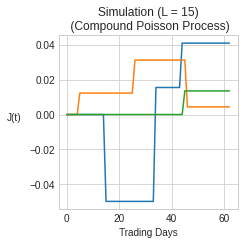

In [10]:
# This is the compensated Poission Process! (Phew*)  
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(3.5,3.5))
    ax.yaxis.labelpad = 15
    plt.plot(JT)

    plt.ylabel("J(t)", rotation = 'horizontal')
    plt.xlabel("Trading Days")
    plt.title("Simulation (L = " + str(int(Lambda)) + ")\n (Compound Poisson Process)")
    
    plt.tight_layout()        
    plt.show()

In [2]:
def GBM_FAST(mu, dt, time, So, n_lines, vol):

    n = int(252 * time)

    sigma = np.array([vol]*n_lines)

    S = np.exp( (mu - sigma ** 2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T )
    S = np.vstack([np.ones(len(sigma)), S])
    S = So * S.cumprod(axis=0)
    S = S[:n]
    return(S) 

In [128]:
n_lines = 2
rows = 5

A = np.array([0.0]*(rows*n_lines))
A = A.reshape(rows, n_lines)
A[2,0] = 100


print(A)



[[  0.   0.]
 [  0.   0.]
 [100.   0.]
 [  0.   0.]
 [  0.   0.]]


(63, 3)


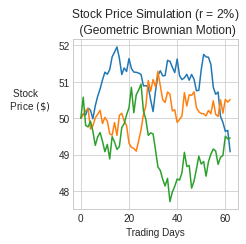

In [117]:
mu = .02
So = 50
vol = .10

S = GBM_FAST(mu, Delta_t, Time, So, N_lines, vol)
print(S.shape)


with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(3.5,3.5))
    ax.yaxis.labelpad = 25
    plt.plot(S)
    
    plt.ylabel("Stock      \n Price $(\$)$    \n", rotation = 'horizontal')
    plt.xlabel("Trading Days")
    plt.title("Stock Price Simulation (r = " + str(int(mu*100)) + "$\%$)\n (Geometric Brownian Motion)")
    
    plt.tight_layout()        
    plt.show()

In [3]:
eJ = np.exp(JT);
eJ = eJ.reshape(len(eJ), N_lines )

print( eJ.shape  ) 

NameError: name 'JT' is not defined

In [29]:

def MERTONS_JUMP(So, mu, sigma, Lambda, Time, Delta_t, N_lines):
  changes = [] 
  Nsteps = int(Time/Delta_t)
  # JUMP COMPENENT
  for i in range(0, N_lines):
    Poisson = np.random.poisson( Lambda*Delta_t , [Nsteps])
    changes.append(Poisson[:len(Poisson)-1,  ] - Poisson[1:,  ] )

  JT = [] 

  for i in range(0, N_lines):
    index = np.where(changes[i] == -1)
    index = np.array((index[0]+1))  # This is the location where jumps occur
    
    Y_i = np.random.normal(loc=0.0, scale=.05, size = (len(index)))   # Should this be an F distribution? 
    Jt = np.zeros(Nsteps)  
    Jt[index,] = Y_i
    Jt = Jt.cumsum()

    JT.append(Jt)
    
  JT = np.array(JT).T

  # standard GBM 
  n = int(252 * Time)   #  weekly 
  sigma = np.array([sigma]*N_lines)
  
  S = np.exp( (mu - sigma ** 2 / 2) * Delta_t + sigma * np.random.normal(0, np.sqrt(Delta_t), size=(len(sigma), n)).T )
  S = np.vstack([np.ones(len(sigma)), S])
  S = So * S.cumprod(axis=0)
  S = S[:n]
  
  final_data = S*np.exp(JT)

  return(final_data)


In [28]:

So = 100
mu = .02
sigma = .30

Lambda = 15.0
N_lines = 3         ##  Number of lines

Time = .25 
Delta_t = 1/252



(2, 1)
102.12054688510135


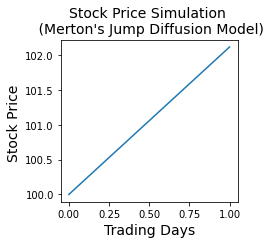

In [36]:
Delta_t = 1/52
Time = 2/52

Sj = MERTONS_JUMP(So, mu, sigma, Lambda, Time, Delta_t, 1)  
print(float(Sj[1]) )

fig, ax = plt.subplots(figsize=(3.5,3.5))
plt.plot(Sj)

plt.title("Stock Price Simulation \n (Merton's Jump Diffusion Model)", fontsize = 14)
plt.ylabel("Stock Price ", fontsize = 14)
plt.xlabel("Trading Days", fontsize = 14)

plt.tight_layout()        
plt.show()


In [3]:

def d_dict(df0):
    n_row, n_col = df0.shape
    r_total = "{:,}".format(n_row)
    print("ROW TOTAL = " + str(r_total) + " COLUMNS = " + str(n_col))

    summary = pd.DataFrame(df0.dtypes)

    percent_missing = list(df0.isnull().sum() * 100 / len(df0))
    summary.insert(1, '%_Blank', percent_missing)
    summary = summary.reset_index()
    summary.columns = ['Variable_Name', 'Variable_Type', '%_Blank']

    sum_stats = df0.describe().T
    sum_stats = sum_stats.reset_index()

    final_summary = pd.merge(summary, sum_stats, how = 'left', left_on = 'Variable_Name', right_on = 'index')
    final_summary = final_summary.reset_index()
    final_summary = final_summary.iloc[:, 1:] # drop the firt column
    del final_summary['index']
    return(final_summary)
    

In [42]:
url = 'https://github.com/Riley25/FE-800/blob/main/model_prediction_res.xlsx?raw=true'
df = pd.read_excel(url)   

df[['Start_Date', 'End_Date']] = df['Week'].str.split('/', 1, expand = True)

df = df[['Start_Date', 'Jumps', 'Return', 'Vol', 'close_price']]
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
#df['End_Date'] = pd.to_datetime(df['End_Date'])

min_date = np.min(df['Start_Date'])
max_date = np.max(df['Start_Date'])

TTM = (max_date - min_date)
TTM = int(TTM.days)/252 ; print('TIME TO MATURITY  = ' + str(TTM))

SO = df['close_price']

print('Earliest Time = ' + str(min_date) +',  Max Date = ' + str(max_date) ) 

df = df.set_index('Start_Date')
n_row, n_col = df.shape

df.head()

TIME TO MATURITY  = 3.5277777777777777
Earliest Time = 2020-04-20 00:00:00,  Max Date = 2022-09-26 00:00:00


,Jumps,Return,Vol,close_price
Start_Date,,,,
2020-04-20,0.000000,1.012572,0.000467,67.520035
2020-04-27,0.000000,1.002212,0.004527,72.128098
2020-05-04,0.000000,1.006729,0.003557,74.568359
2020-05-11,1.483508,1.003967,0.002271,75.992264
2020-05-18,1.147195,1.004160,0.004847,77.997444


In [7]:
df['close_price'].iloc[n_row-1]

142.244033813476

In [5]:
start_price = df['close_price'].iloc[0]   

In [43]:
y = 'Jumps'
y2 = 'Return'
y3 = 'Vol'	

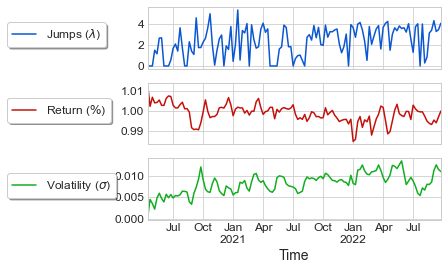

In [234]:

with plt.style.context('seaborn-whitegrid'):
  fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (7, 4), sharex=True)

  fig.suptitle('', fontsize = 14)

  df[y].plot(  ax = ax1 , color = '#0a57d1' ) # blue
  df[[y2]].plot( ax = ax2 , color = '#c4100a' ) # red
  df[[y3]].plot( ax = ax3 , color = '#10ad1f' ) # green 
 
  ax3.set_xlabel('Time', fontsize = 14)
  
  for label in (ax1.get_xticklabels() + ax1.get_yticklabels()): label.set_fontsize(12)  
  for label in (ax2.get_xticklabels() + ax2.get_yticklabels()): label.set_fontsize(12)  
  for label in (ax3.get_xticklabels() + ax3.get_yticklabels()): label.set_fontsize(12)  

  ax1.legend(['Jumps ($\lambda$)'] , bbox_to_anchor=(-0.5, .85), loc='upper left', ncol = 3, fancybox = True, shadow = True, frameon  = True, fontsize = 12)
  ax2.legend(['Return ($\%$)'] , bbox_to_anchor=(-0.5, .85), loc='upper left', ncol = 3, fancybox = True, shadow = True, frameon  = True, fontsize = 12)
  ax3.legend(['Volatility ($\sigma$)'] , bbox_to_anchor=(-0.5, .85), loc='upper left', ncol = 3, fancybox = True, shadow = True, frameon  = True, fontsize = 12)

  plt.tight_layout()    
  plt.show()         
     

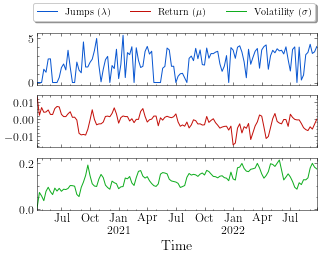

In [44]:

df['Return'] = df['Return'] - 1      #  transform the data
df['Vol'] = df['Vol']*np.sqrt(252)   #  

with plt.style.context('science'):
  fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (5.01, 3.25), sharex=True)

  fig.suptitle('', fontsize = 14)

  df[[y]].plot(  ax = ax1 , legend=False , color = '#0a57d1' ) # blue
  df[[y2]].plot( ax = ax2 , legend=False , color = '#c4100a' ) # red
  df[[y3]].plot( ax = ax3 , legend=False , color = '#10ad1f' ) # green 
 
  ax3.set_xlabel('Time', fontsize = 14)
  
  for label in (ax1.get_xticklabels() + ax1.get_yticklabels()): label.set_fontsize(12)  
  for label in (ax2.get_xticklabels() + ax2.get_yticklabels()): label.set_fontsize(12)  
  for label in (ax3.get_xticklabels() + ax3.get_yticklabels()): label.set_fontsize(12)  

  fig.legend(('Jumps ($\lambda$)', 'Return ($\mu$)', 'Volatility ($\sigma$)'), bbox_to_anchor=(0.91 , 1.03), ncol=3, bbox_transform=fig.transFigure, fancybox = True, shadow = True, frameon  = True, fontsize = 10)

  #plt.tight_layout()
  plt.savefig('plots/GBM_INPUTS.jpg' , dpi = 550)    
  plt.show()      



In [57]:
Delta_t = 1/252
Time = 2/252

SO = 69.46915

TTM = 50
n_lines = 100
n_row = TTM

S = np.array([0.0]*(TTM*n_lines))     #  empty data frame
S = S.reshape(TTM, n_lines)
print(S.shape)

#SO = df['close_price'].iloc[0] 
#S_i =  df['close_price'].iloc[0] 
S[0,:] = SO

for i in range(0, n_lines):

  S_i =  SO 

  for j in range(1, TTM):

    mu = df['Return'].iloc[(j-1)]
    sigma = df['Vol'].iloc[(j-1)]
    Lambda = df['Jumps'].iloc[(j-1)]

    ####  syntax (S0,  mu, sigma,  LAMBDA, Time, Delta_t, n_lines)   ##########
    S_i = MERTONS_JUMP(S_i, mu, sigma, Lambda, Time, Delta_t, 1)   
    
    S_i = float(S_i[1])
    # print(str(mu) + '  ' + str(sigma) + '  ' + str(Lambda)  + '  ' + str(S_i) )

    S[j,i] = S_i  



(50, 100)


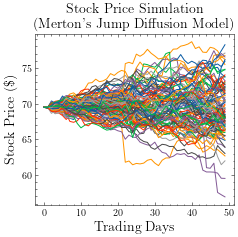

In [68]:
 
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3.5,3.5))
    plt.plot(S)
    
    plt.ylabel("Stock Price $(\$)$ ", fontsize = 14)
    plt.xlabel("Trading Days", fontsize = 14)
    plt.title("Stock Price Simulation \n (Merton's Jump Diffusion Model)", fontsize = 14)
    
    plt.tight_layout()    
    plt.savefig('plots/GBM_FINAL_SIM.jpg', dpi = 550)    
    plt.show()



In [59]:
GBM_JUMP_DF = pd.DataFrame( S )
GBM_JUMP_DF.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,...,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150
1,69.430887,69.483817,69.491456,69.452756,69.473533,69.457833,69.561163,69.395108,69.463234,69.579646,...,69.510241,69.456707,69.514088,69.513012,69.448041,69.461659,69.451326,69.464941,69.471595,69.514463
2,69.898355,69.576912,69.582824,69.888291,69.478569,69.442124,69.684140,69.475453,69.206985,69.372128,...,69.121195,69.307980,69.569780,68.969174,68.925088,69.651628,69.594660,69.407437,69.747282,69.663838
3,69.837778,69.494463,69.238400,70.319622,69.111155,69.322934,69.685650,69.732017,69.315941,68.858799,...,69.172024,69.264177,69.692704,69.099461,68.846504,69.558371,69.633374,69.923893,70.119923,69.588577
4,69.740559,69.622392,69.196453,70.412059,69.158890,69.541072,69.707090,69.680216,69.360867,68.971316,...,69.114407,69.327848,69.822116,69.182777,68.984091,69.448182,69.525764,70.024458,70.025209,69.632265


In [61]:


GBM_JUMP_DF.to_excel('GBM_JUMP_DF.xlsx', index = False)



In [62]:
url = 'https://github.com/Riley25/FE-800/blob/main/GBM_JUMP_DF.xlsx?raw=true'
GBM_JUMP_DF_v2 = pd.read_excel(url)


In [63]:
GBM_JUMP_DF_v2.head(2)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,...,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150,69.469150
1,69.430887,69.483817,69.491456,69.452756,69.473533,69.457833,69.561163,69.395108,69.463234,69.579646,...,69.510241,69.456707,69.514088,69.513012,69.448041,69.461659,69.451326,69.464941,69.471595,69.514463


In [ ]:
n_row, n_col = GBM_JUMP_DF_v2.shape   

In [67]:
# [col][row]
# GBM_JUMP_DF_v2[]][1]  

69.46915

#### Profit and Loss (PnL)

In [200]:
def BS_PRICE(S, K, sigma, delta, r, time):
  d1 = ((np.log(S/K)) + (((r-delta)+.5*sigma*sigma)*time))
  d1= d1/(sigma*np.sqrt(time))
  nd1 = norm.cdf(d1,loc=0, scale=1)

  d2 = d1 -sigma*np.sqrt(time)
  nd2 = norm.cdf(d2,loc=0, scale=1)

  BS_CALL = S*np.exp(-delta*time)*nd1 - K*np.exp(-r*time)*nd2  
  BS_PUT = BS_CALL + K*np.exp(-r*time) - S*np.exp(-delta*time)
  return(BS_CALL, BS_PUT)

In [199]:

def CHOOSER_PRICE(So, K, r, q, sigma, TIME, time ):

    d1 = (np.log( So / K )  + (r - q + (sigma**2)/2)*TIME) / sigma * np.sqrt(TIME)   

    d2 = d1 - sigma * np.sqrt(TIME)

    d1_star = (np.log( So / K )  + (r - q)*TIME + ((sigma**2/2)*time) ) / sigma * np.sqrt(time)

    d2_star = d1_star - sigma * np.sqrt(time)

    price = So * np.exp( -q*TIME ) * norm.cdf(d1,loc=0, scale=1) - K * np.exp(-r*TIME) * norm.cdf(d2,loc=0, scale=1) - So * np.exp( -q*TIME ) * norm.cdf(-d1_star,loc=0, scale=1) + K * np.exp( -r * TIME) * norm.cdf(-d2_star, loc=0, scale=1)

    return(price) 

In [198]:
def CHOOSER_DELTA(So, K, r, q, sigma, TIME, time):
    
    d1 = (np.log( So / K )  + (r - q + (sigma**2)/2)*TIME) / sigma * np.sqrt(TIME)   
    d2 = d1 - sigma * np.sqrt(TIME)

    d1_star = (np.log( So / K )  + (r - q)*TIME + ((sigma**2/2)*time) ) / sigma * np.sqrt(time)
    d2_star = d1_star - sigma * np.sqrt(time)
    
    delta = np.exp(-q * TIME) * norm.cdf(d1) + np.exp(-q * TIME) * (norm.cdf(d1_star) - 1)
        
    return(delta)

In [197]:

def delta_neutral_pnl(S, K, TIME, r, q, sigma, time, S1, S2):
    
    # option premium
    o_price = CHOOSER_PRICE(S, K, r, q, sigma, TIME, time )
    
    # at time 0, build up portfolio 
    delta = CHOOSER_DELTA(S, K, TIME, time, r, q, sigma ) # chooser option delta at 08/01, and premium
    #contracts = (-  * S) / delta
    contracts = 1
    premium = contracts * o_price
    
    # at time t, decide to choose either call or put
    c, p = BS_PRICE(S, K, sigma, delta, r, time)

    p = c + K * np.exp(-r * TIME) - S1
    
    if c >= p:
        # we choose call, pnl calculated as follow
        pnl = (S2 - S)  + (S2 - K) * contracts - premium
    else:
        # we choose put , pnl calculated as follow
        pnl = (S2 - S) + (K - S2) * contracts - premium 
    return(pnl)



In [ ]:

sigma = .28
r = 0.0425
q = 0.0065

TIME = TTM
time = (TTM / 2)



In [202]:

# delta_neutral_pnl(S, K, TIME, r, q, sigma, time, S1, S2)

